# Group Project 2

By: Eve Dean, Jacob Brandis, Eric Vandament

In [98]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Election Results 


##Data Loading & Cleaning

In [99]:
statesAreaDf = pd.read_csv('/content/statesArea.csv')
statesAreaDf

,Abbreviation,State Name,Region
0,AL,Alabama,Southeast
1,AK,Alaska,West
2,AZ,Arizona,Southwest
3,AR,Arkansas,Southeast
4,CA,California,West
5,CO,Colorado,West
6,CT,Connecticut,Northeast
7,DE,Delaware,Northeast
8,FL,Florida,Southeast
9,GA,Georgia,Southeast


Load & Clean Primary Results

In [100]:
# Making new df of counties where trump and cruz won, and clinton and sanders won

results_df = pd.read_csv("/content/drive/MyDrive/Project 2 Data/primary_results.csv")

results_df = results_df.merge(statesAreaDf, left_on = 'state', right_on = 'State Name')

TrumpCruzDf = results_df[(results_df['candidate'] == 'Donald Trump') | (results_df['candidate'] == 'Ted Cruz')]
HillarySandersDf = results_df[(results_df['candidate'] == 'Hillary Clinton') | (results_df['candidate'] == 'Bernie Sanders')]
TrumpCruzDf

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes,Abbreviation,State Name,Region
135,Alabama,AL,Autauga,1001.0,Republican,Donald Trump,5387,0.445,AL,Alabama,Southeast
138,Alabama,AL,Autauga,1001.0,Republican,Ted Cruz,2482,0.205,AL,Alabama,Southeast
140,Alabama,AL,Baldwin,1003.0,Republican,Donald Trump,23618,0.469,AL,Alabama,Southeast
143,Alabama,AL,Baldwin,1003.0,Republican,Ted Cruz,8571,0.170,AL,Alabama,Southeast
145,Alabama,AL,Barbour,1005.0,Republican,Donald Trump,1710,0.501,AL,Alabama,Southeast
...,...,...,...,...,...,...,...,...,...,...,...
24602,Wyoming,WY,Sweetwater-Carbon,95600026.0,Republican,Ted Cruz,45,0.506,WY,Wyoming,West
24603,Wyoming,WY,Teton-Sublette,95600028.0,Republican,Donald Trump,21,0.525,WY,Wyoming,West
24606,Wyoming,WY,Teton-Sublette,95600028.0,Republican,Ted Cruz,0,0.000,WY,Wyoming,West
24607,Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,Donald Trump,0,0.000,WY,Wyoming,West


In [101]:
# Grouping them
trump_cruz = TrumpCruzDf.groupby('county')
clinton_sanders = HillarySandersDf.groupby('county')

Load & Clean County Facts

In [81]:
#find winner of primary per county, add column displying win (T/F)
clinton_win=[]
county_fips = []
county_names = []
for county, county_df in clinton_sanders:
  row_with_max_votes = county_df[county_df['fraction_votes'] == county_df['fraction_votes'].max()]
  winner = row_with_max_votes['candidate']
  x = winner.to_string(index=False)
  if x == 'Hillary Clinton':
      clinton_win.append(1)
  else:
      clinton_win.append(0)
  county_fips.append(row_with_max_votes['fips'].to_string(index=False))
  county_names.append(row_with_max_votes['county'].to_string(index=False))

# clint_df = pd.DataFrame (clinton_win, columns = ['clinton_win'])

clint_df = pd.DataFrame ({'county':county_names,'fips':county_fips,'clinton_win':clinton_win})

In [82]:
# Converting into str, so they can be compared
HillarySandersDf['fips']=HillarySandersDf['fips'].astype(str)
clint_df['fips']=clint_df['fips'].astype(str)
myNewDf = HillarySandersDf.merge(clint_df, on = 'fips')


<ipython-input-82-a821dae15f9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HillarySandersDf['fips']=HillarySandersDf['fips'].astype(str)


In [83]:
#find winner of primary per county, add column displying win (T/F)
trump_win=[]
county_fips = []
county_names = []
for county, county_df in trump_cruz:
  row_with_max_votes = county_df[county_df['fraction_votes'] == county_df['fraction_votes'].max()]
  winner = row_with_max_votes['candidate']
  x = winner.to_string(index=False)
  if x == 'Donald Trump':
      trump_win.append(1)
  else:
      trump_win.append(0)
  county_fips.append(row_with_max_votes['fips'].to_string(index=False))
  county_names.append(row_with_max_votes['county'].to_string(index=False))

# clint_df = pd.DataFrame (clinton_win, columns = ['clinton_win'])

trump_df = pd.DataFrame ({'county':county_names,'fips':county_fips,'trump_win':trump_win})

In [84]:
# Converting into str, so they can be compared
TrumpCruzDf['fips']=TrumpCruzDf['fips'].astype(str)
trump_df['fips']=trump_df['fips'].astype(str)
myNewDf2 = TrumpCruzDf.merge(trump_df, on = 'fips')

<ipython-input-84-56b808834ef5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TrumpCruzDf['fips']=TrumpCruzDf['fips'].astype(str)


In [85]:
# loading county df
county_df = pd.read_csv('/content/drive/MyDrive/Project 2 Data/county_facts.csv')

In [86]:
# renaming columns to english
county_df = county_df.rename(columns={'PST045214':'Population_est (2014)',
                                      'PST040210':'Population_est (2010)',
                                      'PST120214':'Population_PCT_Change (2010-2014)',
                                      'POP010210':'Population (2010)',
                                      'AGE135124':'Under_5_age_pct (2014)',
                                      'AGE295214':'Under_18_age_pct (2014)',
                                      'AGE775214':'Over_65_age_pct (2014)',
                                      'SEX255214':'Female_pct (2014)',
                                      'RHI125214':'White_pct (2014)',
                                      'RHI225214':'Black_pct (2014)',
                                      'RHI325214':'IndianAmer_pct (2014)',
                                      'RHI425214':'Asian_pct (2014)',
                                      'RHI525214':'Hawaiian_pct (2014)',
                                      'RHI625214':'Biracial_pct (2014)',
                                      'RHI725214':'Hispanic_pct (2014)',
                                      'RHI825214':'Caucasian_pct (2014)',
                                      'POP715213':'Home_duration_over_1_year_ptc (2009-2013)',
                                      'POP645213':'Expatriate_pct (2009-2014)',
                                      'POP815213':'Bilingual_home_age_5_over_ptc (2009-2013)',
                                      'EDU635213':'GED_degree_age_25_over_pct (2009-2013)',
                                      'EDU685213':'Bachelor_degree_age_25_over_pct (2009-2013)',
                                      'VET605213':'Veterans (2009-2013)',
                                      'LFE305213':'Work_commute_min_age_16_over (2009-2013)',
                                      'HSG010214':'Num_houses (2014)',
                                      'HSG445213':'Homeownership_pct (2009-2013)',
                                      'HSG096213':'Muti_unit_houses_pct (2009-2013)',
                                      'HSG495213':'Median_home_value_owner_occupied (2009-2013)',
                                      'HSD410213':'Num_households (2009-2013)',
                                      'HSD310213':'Num_people_per_household (2009-2013)',
                                      'INC910213':'Per_capita_income_12_months (2013)',
                                      'INC110213':'Median_household_income (2009-2013)',
                                      'PVY020213':'Pct_below_pverty_level (2009-2013)',
                                      'BZA010213':'Private_establishment (2013)',
                                      'BZA110213':'Num_private_establishment_employees (2013)',
                                      'BZA115213':'Pct_change_private_establishment_employees (2009-2013)',
                                      'NES010213':'Nonemployer_establishments (2013)',
                                      'SBO001207':'Num_firms (2007)',
                                      'SBO315207':'Black_owned_firms_pct (2007)',
                                      'SBO115207':'IndianAmer_owned_firms_pct (2007)',
                                      'SBO215207':'Asian_owned_firms_pct (2007)',
                                      'SBO515207':'Hawaiian_owned_firms_pct (2007)',
                                      'SBO415207':'Hispanic_owned_firms_pct (2007)',
                                      'SBO015207':'Women_owned_firms_pct (2007)',
                                      'MAN450207':'Manufacturers_shipments_by_$1000 (2007)',
                                      'WTN220207':'Merchant_wholesaler_sales_by_$1000 (2007)',
                                      'RTN130207':'Retail_sales_by_$1000 (2007)',
                                      'RTN131207':'Retail_sales_per_capita (2007)',
                                      'AFN120207':'Accom_and_food_service_sales_by_$1000 (2007)',
                                      'BPS030214':'Building_permits (2014)',
                                      'LND110201':'Land_area_in_sqr_miles (2010)',
                                      'POP060210':'Population_per_sqr_mile (2010)',
                                      'EDU685213':'Bachelors degree or higher, percent of persons age 25+, 2009-2013',
                                      'LND110210': 'Land area in square miles, 2010',
                                      'AGE135214':'Persons under 5 years, percent, 2014'})

In [87]:
# merging dfs on state and fips
full_df = pd.merge(results_df, county_df, on = ['state_abbreviation','fips'])
full_df.columns

# Sanity Check
county_df

,fips,area_name,state_abbreviation,Population_est (2014),Population_est (2010),Population_PCT_Change (2010-2014),Population (2010),"Persons under 5 years, percent, 2014",Under_18_age_pct (2014),Over_65_age_pct (2014),...,Hispanic_owned_firms_pct (2007),Women_owned_firms_pct (2007),Manufacturers_shipments_by_$1000 (2007),Merchant_wholesaler_sales_by_$1000 (2007),Retail_sales_by_$1000 (2007),Retail_sales_per_capita (2007),Accom_and_food_service_sales_by_$1000 (2007),Building_permits (2014),"Land area in square miles, 2010",Population_per_sqr_mile (2010)
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,45010,43806,2.7,43806,7.3,27.0,9.5,...,3.8,27.2,0,437493,898189,22843,150439,227,10426.65,4.2
3191,56039,Teton County,WY,22930,21294,7.7,21294,5.7,19.1,12.2,...,3.3,25.3,0,0,515644,25688,327363,145,3995.38,5.3
3192,56041,Uinta County,WY,20904,21118,-1.0,21118,7.6,29.8,11.0,...,2.2,15.9,0,159375,413983,20626,35497,40,2081.26,10.1
3193,56043,Washakie County,WY,8322,8533,-2.5,8533,5.5,23.9,20.1,...,0.0,26.9,0,12128,98308,12596,10175,4,2238.55,3.8


In [88]:
# Curious to see how many states voted in our data
states_df = results_df.groupby('state').agg({'votes': sum})
states_df = states_df.reset_index(drop=False)

states_df.head()


,state,votes
0,Alabama,1223959
1,Alaska,22469
2,Arizona,834200
3,Arkansas,605971
4,California,4938197


In [89]:
# How many votes are there?
states_df['votes'].sum()

56759187

#Linear Regression Modeling - Regions

In [90]:
# Making dfs by each region
full_df['votes_100K'] = (full_df['votes']/full_df['Population_est (2014)'])*100000
Southeastdf =  full_df[full_df['Region'] == 'Southeast']

Northeastdf =  full_df[full_df['Region'] == 'Northeast']

Westdf =  full_df[full_df['Region'] == 'West']

Midwestdf =  full_df[full_df['Region'] == 'Midwest']

Southwestdf =  full_df[full_df['Region'] == 'Southwest']

[-117.36526098 -111.16075168  -31.99063453 -372.0428242  -225.41933246
 -124.98565189 -117.61862843]
14989.739175427627


<ipython-input-91-8123b7754514>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Southeastdf['vote_preds'] = lr.predict(X_dem)


0.0031325810211628724

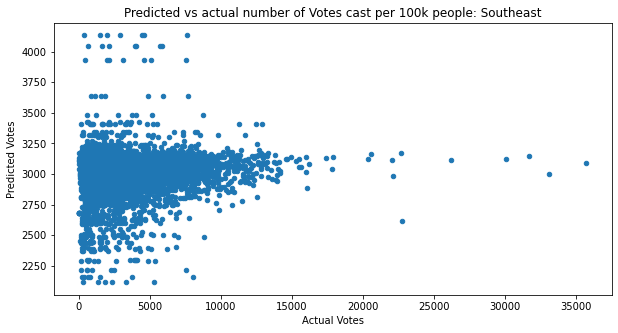

In [91]:
# Southeastdf
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

X_dem = Southeastdf[['Black_pct (2014)',
            'IndianAmer_pct (2014)',
            'Asian_pct (2014)',
            'Hawaiian_pct (2014)',
            'Biracial_pct (2014)',
            'Hispanic_pct (2014)',
            'Caucasian_pct (2014)']]
y_dem = Southeastdf['votes_100K']

lr.fit(X_dem,y_dem)
print(lr.coef_)
print(lr.intercept_)
Southeastdf['vote_preds'] = lr.predict(X_dem)

Southeastdf.plot(kind = 'scatter',
                   x = 'votes_100K',
                   y = 'vote_preds',
                   xlabel = 'Actual Votes',
                   ylabel = 'Predicted Votes',
                   title =  'Predicted vs actual number of Votes cast per 100k people: Southeast',
                   legend = False,
                   figsize = (10,5),
                   rot = 0)

from sklearn.metrics import r2_score
r2Southeast = r2_score
r2Southeast(Southeastdf['votes_100K'], Southeastdf['vote_preds'])

[ 140.37443066 -244.96599891  148.49933691 1305.16792916 -310.97367075
   56.32841294  128.8448191 ]
-8001.090947260642


<ipython-input-92-53b6587e0d7a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Northeastdf['vote_preds'] = lr2.predict(X_dem)


0.0440965143291957

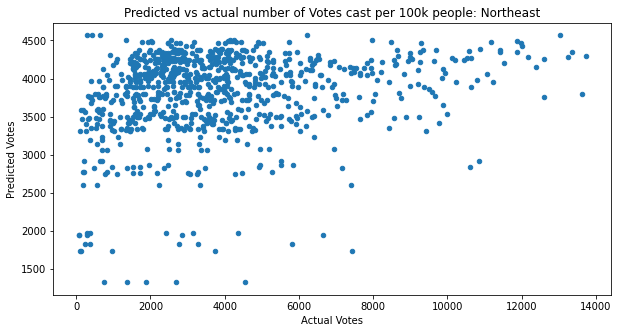

In [92]:
# Northeastdf
lr2 = LinearRegression()

X_dem = Northeastdf[['Black_pct (2014)',
            'IndianAmer_pct (2014)',
            'Asian_pct (2014)',
            'Hawaiian_pct (2014)',
            'Biracial_pct (2014)',
            'Hispanic_pct (2014)',
            'Caucasian_pct (2014)']]
y_dem = Northeastdf['votes_100K']

lr2.fit(X_dem,y_dem)
print(lr2.coef_)
print(lr2.intercept_)
Northeastdf['vote_preds'] = lr2.predict(X_dem)

Northeastdf.plot(kind = 'scatter',
                   x = 'votes_100K',
                   y = 'vote_preds',
                   xlabel = 'Actual Votes',
                   ylabel = 'Predicted Votes',
                   title =  'Predicted vs actual number of Votes cast per 100k people: Northeast',
                   legend = False,
                   figsize = (10,5),
                   rot = 0)
r2Northeast = r2_score
r2Northeast(Northeastdf['votes_100K'], Northeastdf['vote_preds'])

[ -497.32417355  -318.13123232  -273.60058223 -1502.73233815
   168.42120928  -324.40285891  -305.57433431]
33713.40000114423


<ipython-input-93-2df02ff017c6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Westdf['vote_preds'] = lr3.predict(X_dem)


0.0567986816290178

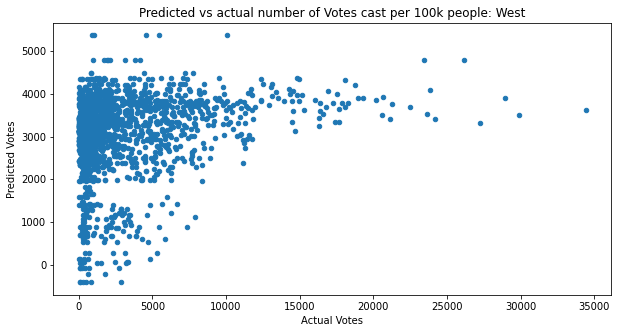

In [93]:
# Westdf

lr3 = LinearRegression()

X_dem = Westdf[['Black_pct (2014)',
            'IndianAmer_pct (2014)',
            'Asian_pct (2014)',
            'Hawaiian_pct (2014)',
            'Biracial_pct (2014)',
            'Hispanic_pct (2014)',
            'Caucasian_pct (2014)']]
y_dem = Westdf['votes_100K']

lr3.fit(X_dem,y_dem)
print(lr3.coef_)
print(lr3.intercept_)
Westdf['vote_preds'] = lr3.predict(X_dem)

Westdf.plot(kind = 'scatter',
                   x = 'votes_100K',
                   y = 'vote_preds',
                   xlabel = 'Actual Votes',
                   ylabel = 'Predicted Votes',
                   title =  'Predicted vs actual number of Votes cast per 100k people: West',
                   legend = False,
                   figsize = (10,5),
                   rot = 0)
r2West = r2_score
r2West(Westdf['votes_100K'], Westdf['vote_preds'])

[ -259.61512128  -293.99773858  -293.12632371 -2516.26774043
   288.10032693  -312.03432997  -276.90756195]
30644.50577572685


<ipython-input-94-c2cb73de0237>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Midwestdf['vote_preds'] = lr4.predict(X_dem)


0.025200859253721064

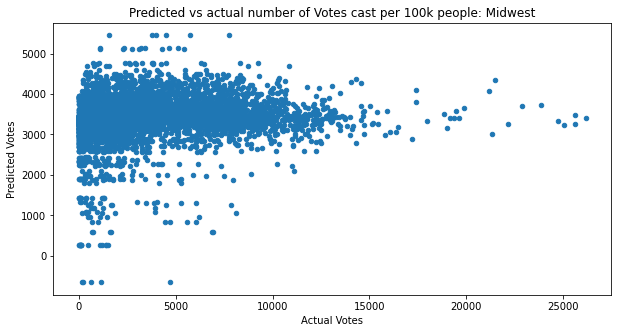

In [94]:
# Midwestdf
lr4 = LinearRegression()

X_dem = Midwestdf[['Black_pct (2014)',
            'IndianAmer_pct (2014)',
            'Asian_pct (2014)',
            'Hawaiian_pct (2014)',
            'Biracial_pct (2014)',
            'Hispanic_pct (2014)',
            'Caucasian_pct (2014)']]
y_dem = Midwestdf['votes_100K']

lr4.fit(X_dem,y_dem)
print(lr4.coef_)
print(lr4.intercept_)
Midwestdf['vote_preds'] = lr4.predict(X_dem)

Midwestdf.plot(kind = 'scatter',
                   x = 'votes_100K',
                   y = 'vote_preds',
                   xlabel = 'Actual Votes',
                   ylabel = 'Predicted Votes',
                   title =  'Predicted vs actual number of Votes cast per 100k people: Midwest',
                   legend = False,
                   figsize = (10,5),
                   rot = 0)
r2Midwest = r2_score
r2Midwest(Midwestdf['votes_100K'], Midwestdf['vote_preds'])

[ -23.97987694   19.60029372   -7.68091206 -631.06475443 -127.17826767
   21.29420163   42.77482567]
273.5511331631956


<ipython-input-95-aa22656baade>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Southwestdf['vote_preds'] = lr5.predict(X_dem)


0.02795997974765796

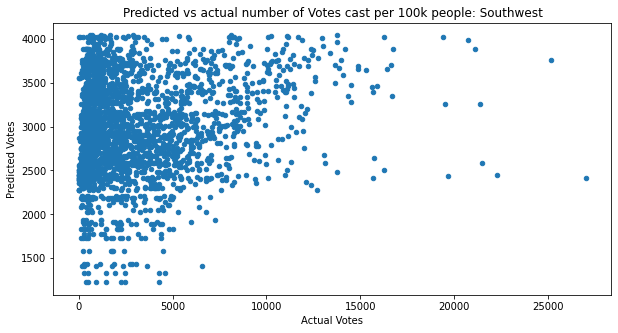

In [95]:
# Southwestdf

lr5 = LinearRegression()

X_dem = Southwestdf[['Black_pct (2014)',
            'IndianAmer_pct (2014)',
            'Asian_pct (2014)',
            'Hawaiian_pct (2014)',
            'Biracial_pct (2014)',
            'Hispanic_pct (2014)',
            'Caucasian_pct (2014)']]
y_dem = Southwestdf['votes_100K']

lr5.fit(X_dem,y_dem)
print(lr5.coef_)
print(lr5.intercept_)
Southwestdf['vote_preds'] = lr5.predict(X_dem)

Southwestdf.plot(kind = 'scatter',
                   x = 'votes_100K',
                   y = 'vote_preds',
                   xlabel = 'Actual Votes',
                   ylabel = 'Predicted Votes',
                   title =  'Predicted vs actual number of Votes cast per 100k people: Southwest',
                   legend = False,
                   figsize = (10,5),
                   rot = 0)
r2Southwest = r2_score
r2Southwest(Southwestdf['votes_100K'], Southwestdf['vote_preds'])

# Region differences (Averages)

In [96]:
# Looking at different averages for columns by region

races =     ['Black_pct (2014)',
            'IndianAmer_pct (2014)',
            'Asian_pct (2014)',
            'Hawaiian_pct (2014)',
            'Biracial_pct (2014)',
            'Hispanic_pct (2014)',
            'Caucasian_pct (2014)',
             'Median_household_income (2009-2013)',
             'GED_degree_age_25_over_pct (2009-2013)',
             'Bachelors degree or higher, percent of persons age 25+, 2009-2013',
             'Population_per_sqr_mile (2010)',
             'Pct_below_pverty_level (2009-2013)']
print("Northeast")
for i in races:
  print("Mean of " + i + " is " + str(Northeastdf[i].mean()))

print('\n SouthEast')
for i in races:
  print("Mean of " + i + " is " + str(Southeastdf[i].mean()))

print('\n West')
for i in races:
  print("Mean of " + i + " is " + str(Westdf[i].mean()))

print('\n Midwest')
for i in races:
  print("Mean of " + i + " is " + str(Midwestdf[i].mean()))

print('\n southwest')
for i in races:
  print("Mean of " + i + " is " + str(Southwestdf[i].mean()))


Northeast
Mean of Black_pct (2014) is 8.994915254237288
Mean of IndianAmer_pct (2014) is 0.488135593220339
Mean of Asian_pct (2014) is 2.926553672316384
Mean of Hawaiian_pct (2014) is 0.059322033898305086
Mean of Biracial_pct (2014) is 1.7966101694915255
Mean of Hispanic_pct (2014) is 7.055367231638418
Mean of Caucasian_pct (2014) is 80.10169491525424
Mean of Median_household_income (2009-2013) is 56690.53107344633
Mean of GED_degree_age_25_over_pct (2009-2013) is 87.9045197740113
Mean of Bachelors degree or higher, percent of persons age 25+, 2009-2013 is 25.359887005649718
Mean of Population_per_sqr_mile (2010) is 1614.6757062146892
Mean of Pct_below_pverty_level (2009-2013) is 12.764406779661018

 SouthEast
Mean of Black_pct (2014) is 20.732214861751153
Mean of IndianAmer_pct (2014) is 0.6890841013824884
Mean of Asian_pct (2014) is 1.097825460829493
Mean of Hawaiian_pct (2014) is 0.08090437788018433
Mean of Biracial_pct (2014) is 1.5712989631336407
Mean of Hispanic_pct (2014) is 4.9